# Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
%matplotlib inline
data = pd.read_csv('C:/Users/shrqfrhn/Downloads/data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
data.isnull().values.any()

False

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='ms')

In [6]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-18 06:13:46.200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-18 06:13:46.260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-18 06:13:46.320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-18 06:13:46.380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-18 06:13:46.440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# 4. NASDAQ.CSCO

In [7]:
df_CSCO = pd.DataFrame(data['NASDAQ.CSCO'])
df_CSCO.set_index(data['DATE'], inplace=True)
df_CSCO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41266 entries, 1970-01-18 06:13:46.200000 to 1970-01-18 09:50:09.600000
Data columns (total 1 columns):
NASDAQ.CSCO    41266 non-null float64
dtypes: float64(1)
memory usage: 644.8 KB


In [8]:
df_CSCO.head(5)

,NASDAQ.CSCO
DATE,
1970-01-18 06:13:46.200,33.7400
1970-01-18 06:13:46.260,33.8800
1970-01-18 06:13:46.320,33.9000
1970-01-18 06:13:46.380,33.8499
1970-01-18 06:13:46.440,33.8400


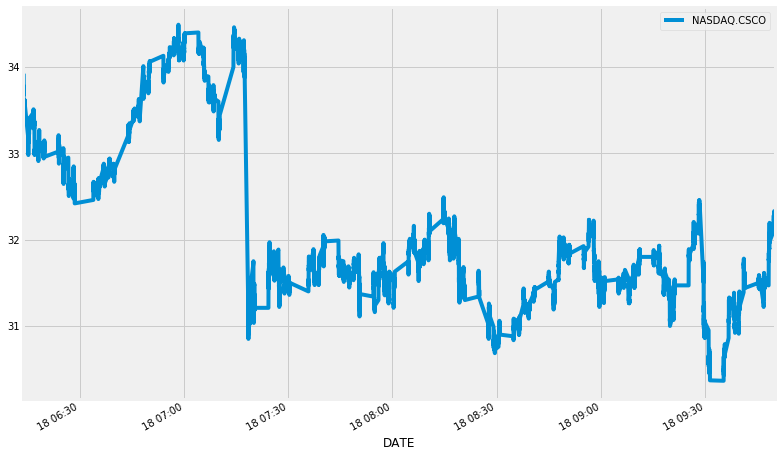

In [9]:
df_CSCO.plot(figsize=(12,8))

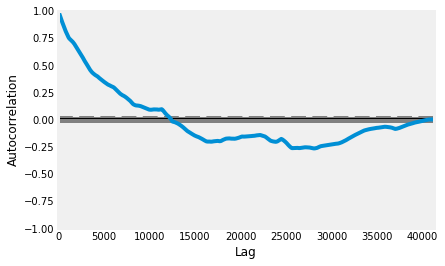

In [10]:
# Create an autocorrelation plot. 
autocorrelation_plot(df_CSCO)
plt.show()

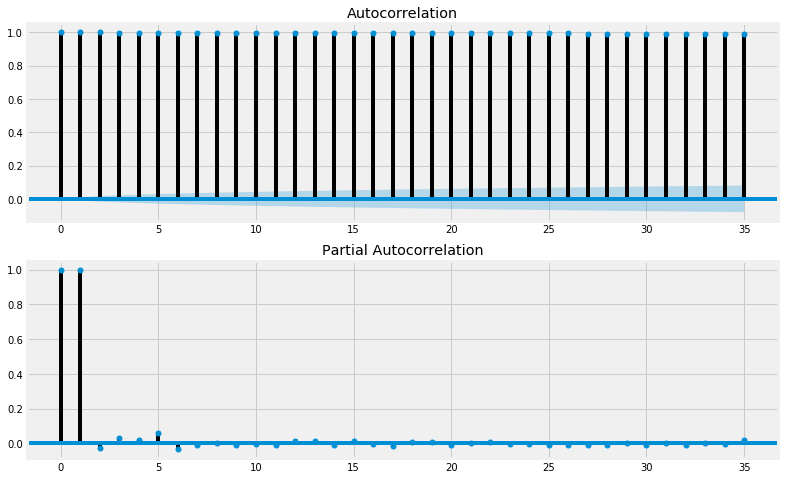

In [11]:
# Create ACF (Auto correlation) and PACF (partial Auto correlation) plots. 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CSCO.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CSCO, method='ywmle', lags=35, ax=ax2)

In [12]:
model = ARIMA(df_CSCO, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CSCO   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood              100305.161
Method:                       css-mle   S.D. of innovations              0.021
Date:                Thu, 21 Feb 2019   AIC                        -200596.323
Time:                        01:26:46   BIC                        -200535.928
Sample:                             1   HQIC                       -200577.234
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.691e-05   9.82e-05     -0.376      0.707      -0.000       0.000
ar.L1.D.NASDAQ.CSCO     0.0166      0.005      3.380      0.001       0.007       0.026
ar.L2.D.NASDAQ.C

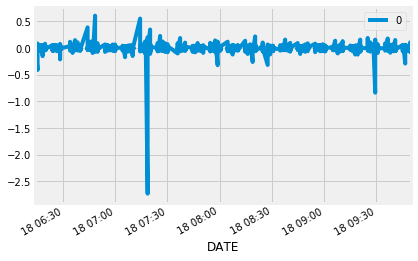

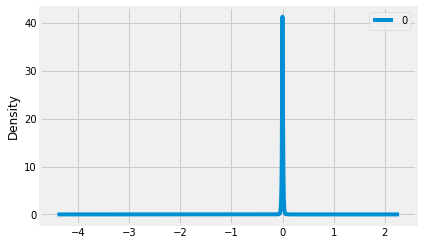

                  0
count  4.126500e+04
mean   1.787831e-07
std    2.128657e-02
min   -2.730452e+00
25%   -6.043834e-03
50%    9.572587e-05
75%    6.414385e-03
max    6.090701e-01


In [13]:
# Plot the residuals of the model. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [14]:
# Test the model with train and test data 
size=int(len(df_CSCO)*0.7)
train, test = df_CSCO.values[0:size], df_CSCO.values[size:len(df_CSCO)]
len(train), len(test)

(28886, 12380)

In [15]:
# Create train list and empty list to store the predictions 
X=list(train)
predictions=[]
for t in range (len(test)):
    model = ARIMA(X, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    X.append(test[t])
    print('%d. predicted=%f, expected=%f' % (len(predictions), yhat, test[t]))

1. predicted=31.874790, expected=31.880000
2. predicted=31.879011, expected=31.900000
3. predicted=31.901536, expected=31.885000
4. predicted=31.883366, expected=31.880000
5. predicted=31.879462, expected=31.900000
6. predicted=31.899753, expected=31.914400
7. predicted=31.916341, expected=31.915000
8. predicted=31.913744, expected=31.920000
9. predicted=31.917955, expected=31.923200
10. predicted=31.922805, expected=31.920000
11. predicted=31.920203, expected=31.909900
12. predicted=31.909150, expected=31.890000
13. predicted=31.889627, expected=31.895000
14. predicted=31.896427, expected=31.897200
15. predicted=31.898119, expected=31.895000
16. predicted=31.895810, expected=31.905000
17. predicted=31.904017, expected=31.910000
18. predicted=31.909850, expected=31.903900
19. predicted=31.903505, expected=31.915000
20. predicted=31.914533, expected=31.920100
21. predicted=31.919999, expected=31.920000
22. predicted=31.920228, expected=31.920100
23. predicted=31.918768, expected=31.9300

186. predicted=31.968785, expected=31.965000
187. predicted=31.965847, expected=31.981000
188. predicted=31.982394, expected=31.985000
189. predicted=31.985590, expected=31.985000
190. predicted=31.984179, expected=31.985000
191. predicted=31.983346, expected=31.980000
192. predicted=31.980161, expected=31.950000
193. predicted=31.949237, expected=31.960000
194. predicted=31.961456, expected=31.955600
195. predicted=31.956062, expected=31.965000
196. predicted=31.967385, expected=31.960000
197. predicted=31.957369, expected=31.960000
198. predicted=31.960715, expected=31.965000
199. predicted=31.964267, expected=31.950000
200. predicted=31.950054, expected=31.955000
201. predicted=31.955311, expected=31.955000
202. predicted=31.954676, expected=31.955000
203. predicted=31.956254, expected=31.950000
204. predicted=31.948684, expected=31.965000
205. predicted=31.965864, expected=31.960000
206. predicted=31.959334, expected=31.962400
207. predicted=31.962678, expected=31.960000
208. predi

369. predicted=31.912392, expected=31.880000
370. predicted=31.880361, expected=31.880000
371. predicted=31.879752, expected=31.880000
372. predicted=31.881361, expected=31.880000
373. predicted=31.882718, expected=31.895000
374. predicted=31.893884, expected=31.900000
375. predicted=31.899578, expected=31.870000
376. predicted=31.868382, expected=31.865000
377. predicted=31.864518, expected=31.880000
378. predicted=31.881557, expected=31.900000
379. predicted=31.902822, expected=31.895400
380. predicted=31.893188, expected=31.920000
381. predicted=31.919109, expected=31.910000
382. predicted=31.907894, expected=31.890000
383. predicted=31.890322, expected=31.895000
384. predicted=31.893867, expected=31.900000
385. predicted=31.902263, expected=31.870000
386. predicted=31.869741, expected=31.865000
387. predicted=31.864418, expected=31.870000
388. predicted=31.870756, expected=31.880000
389. predicted=31.882824, expected=31.870000
390. predicted=31.868172, expected=31.885000
391. predi

552. predicted=31.887589, expected=31.885000
553. predicted=31.886669, expected=31.885000
554. predicted=31.883457, expected=31.894100
555. predicted=31.894453, expected=31.895000
556. predicted=31.894891, expected=31.895000
557. predicted=31.894616, expected=31.900000
558. predicted=31.899364, expected=31.895000
559. predicted=31.894918, expected=31.895000
560. predicted=31.895044, expected=31.895000
561. predicted=31.894643, expected=31.897200
562. predicted=31.897832, expected=31.900000
563. predicted=31.899730, expected=31.910000
564. predicted=31.910136, expected=31.905000
565. predicted=31.904170, expected=31.902900
566. predicted=31.902599, expected=31.880000
567. predicted=31.878648, expected=31.870000
568. predicted=31.871286, expected=31.875000
569. predicted=31.875898, expected=31.855000
570. predicted=31.856002, expected=31.855000
571. predicted=31.855305, expected=31.870000
572. predicted=31.870039, expected=31.875000
573. predicted=31.876390, expected=31.900000
574. predi

735. predicted=31.846946, expected=31.847500
736. predicted=31.849047, expected=31.835000
737. predicted=31.835754, expected=31.825000
738. predicted=31.826850, expected=31.840000
739. predicted=31.840158, expected=31.836700
740. predicted=31.837088, expected=31.835000
741. predicted=31.834908, expected=31.825000
742. predicted=31.823090, expected=31.830000
743. predicted=31.831416, expected=31.830000
744. predicted=31.829960, expected=31.825000
745. predicted=31.825372, expected=31.820000
746. predicted=31.819099, expected=31.805000
747. predicted=31.804927, expected=31.809300
748. predicted=31.810411, expected=31.801000
749. predicted=31.800997, expected=31.830000
750. predicted=31.832085, expected=31.840000
751. predicted=31.838423, expected=31.815000
752. predicted=31.813952, expected=31.820000
753. predicted=31.818098, expected=31.835000
754. predicted=31.836293, expected=31.830000
755. predicted=31.831551, expected=31.850000
756. predicted=31.848961, expected=31.860000
757. predi

918. predicted=31.843943, expected=31.850000
919. predicted=31.850278, expected=31.845000
920. predicted=31.843667, expected=31.840000
921. predicted=31.839444, expected=31.845000
922. predicted=31.845365, expected=31.845000
923. predicted=31.845481, expected=31.840000
924. predicted=31.839831, expected=31.836200
925. predicted=31.835563, expected=31.831000
926. predicted=31.831219, expected=31.834900
927. predicted=31.835627, expected=31.829900
928. predicted=31.829718, expected=31.835000
929. predicted=31.835442, expected=31.835000
930. predicted=31.834321, expected=31.836500
931. predicted=31.836941, expected=31.825000
932. predicted=31.823865, expected=31.830000
933. predicted=31.830700, expected=31.845000
934. predicted=31.845393, expected=31.848100
935. predicted=31.848478, expected=31.830000
936. predicted=31.827982, expected=31.830000
937. predicted=31.829536, expected=31.815000
938. predicted=31.815231, expected=31.821000
939. predicted=31.823237, expected=31.825000
940. predi

1098. predicted=31.800978, expected=31.780000
1099. predicted=31.778339, expected=31.769900
1100. predicted=31.770093, expected=31.775000
1101. predicted=31.774709, expected=31.770000
1102. predicted=31.772046, expected=31.785000
1103. predicted=31.785418, expected=31.755000
1104. predicted=31.752665, expected=31.764600
1105. predicted=31.766201, expected=31.770000
1106. predicted=31.769021, expected=31.765000
1107. predicted=31.767395, expected=31.765600
1108. predicted=31.763533, expected=31.765000
1109. predicted=31.764992, expected=31.772400
1110. predicted=31.773217, expected=31.775000
1111. predicted=31.774501, expected=31.775000
1112. predicted=31.774750, expected=31.775000
1113. predicted=31.774261, expected=31.780000
1114. predicted=31.780215, expected=31.785000
1115. predicted=31.785034, expected=31.770000
1116. predicted=31.769146, expected=31.780000
1117. predicted=31.780288, expected=31.775000
1118. predicted=31.774563, expected=31.771000
1119. predicted=31.772162, expecte

1277. predicted=31.769929, expected=31.765000
1278. predicted=31.765431, expected=31.754600
1279. predicted=31.753624, expected=31.755000
1280. predicted=31.755437, expected=31.755000
1281. predicted=31.755602, expected=31.755000
1282. predicted=31.755530, expected=31.760000
1283. predicted=31.759608, expected=31.760000
1284. predicted=31.759771, expected=31.755000
1285. predicted=31.754655, expected=31.760000
1286. predicted=31.759877, expected=31.760000
1287. predicted=31.760082, expected=31.780000
1288. predicted=31.780880, expected=31.780000
1289. predicted=31.778607, expected=31.790000
1290. predicted=31.790044, expected=31.785000
1291. predicted=31.782827, expected=31.785000
1292. predicted=31.785767, expected=31.780000
1293. predicted=31.779083, expected=31.785000
1294. predicted=31.786109, expected=31.785000
1295. predicted=31.784644, expected=31.785000
1296. predicted=31.785218, expected=31.800000
1297. predicted=31.799813, expected=31.790000
1298. predicted=31.789289, expecte

1456. predicted=32.010957, expected=32.030000
1457. predicted=32.027883, expected=32.029000
1458. predicted=32.028391, expected=32.020000
1459. predicted=32.020073, expected=32.030000
1460. predicted=32.028812, expected=32.035000
1461. predicted=32.035904, expected=32.040000
1462. predicted=32.040378, expected=32.080000
1463. predicted=32.079796, expected=32.070000
1464. predicted=32.068122, expected=32.060000
1465. predicted=32.058915, expected=32.040000
1466. predicted=32.036904, expected=32.039900
1467. predicted=32.043313, expected=32.030000
1468. predicted=32.030407, expected=32.040000
1469. predicted=32.041771, expected=32.047000
1470. predicted=32.046166, expected=32.014400
1471. predicted=32.013570, expected=32.000000
1472. predicted=31.999242, expected=31.995000
1473. predicted=31.995883, expected=32.010000
1474. predicted=32.013818, expected=32.000000
1475. predicted=31.998893, expected=31.993400
1476. predicted=31.992911, expected=32.000000
1477. predicted=31.999206, expecte

1635. predicted=32.119232, expected=32.113200
1636. predicted=32.113803, expected=32.110000
1637. predicted=32.110655, expected=32.115700
1638. predicted=32.114708, expected=32.110000
1639. predicted=32.110597, expected=32.115000
1640. predicted=32.115142, expected=32.120000
1641. predicted=32.119465, expected=32.110000
1642. predicted=32.110026, expected=32.105000
1643. predicted=32.104379, expected=32.105000
1644. predicted=32.105163, expected=32.110000
1645. predicted=32.111227, expected=32.105000
1646. predicted=32.104557, expected=32.100000
1647. predicted=32.099627, expected=32.105000
1648. predicted=32.105000, expected=32.105000
1649. predicted=32.105488, expected=32.105000
1650. predicted=32.105010, expected=32.105700
1651. predicted=32.105052, expected=32.105000
1652. predicted=32.105114, expected=32.115000
1653. predicted=32.115284, expected=32.113400
1654. predicted=32.112894, expected=32.117000
1655. predicted=32.116987, expected=32.120900
1656. predicted=32.120059, expecte

1814. predicted=32.135615, expected=32.130000
1815. predicted=32.129778, expected=32.135000
1816. predicted=32.134961, expected=32.125000
1817. predicted=32.124148, expected=32.120000
1818. predicted=32.120640, expected=32.110000
1819. predicted=32.109394, expected=32.110000
1820. predicted=32.111420, expected=32.110000
1821. predicted=32.110121, expected=32.115000
1822. predicted=32.115683, expected=32.115000
1823. predicted=32.114328, expected=32.120000
1824. predicted=32.120000, expected=32.170000
1825. predicted=32.171029, expected=32.110000
1826. predicted=32.106294, expected=32.140000
1827. predicted=32.141574, expected=32.200000
1828. predicted=32.198405, expected=32.180000
1829. predicted=32.183437, expected=32.220000
1830. predicted=32.215672, expected=32.210000
1831. predicted=32.205172, expected=32.150000
1832. predicted=32.151694, expected=32.140000
1833. predicted=32.137918, expected=32.120000
1834. predicted=32.123476, expected=32.090000
1835. predicted=32.094225, expecte

1993. predicted=31.819700, expected=31.825000
1994. predicted=31.825564, expected=31.805500
1995. predicted=31.804114, expected=31.805000
1996. predicted=31.806118, expected=31.813800
1997. predicted=31.813841, expected=31.810000
1998. predicted=31.811270, expected=31.810000
1999. predicted=31.809073, expected=31.815000
2000. predicted=31.814459, expected=31.815000
2001. predicted=31.815439, expected=31.810000
2002. predicted=31.809499, expected=31.810000
2003. predicted=31.809715, expected=31.810000
2004. predicted=31.810258, expected=31.810000
2005. predicted=31.810330, expected=31.790000
2006. predicted=31.789064, expected=31.800000
2007. predicted=31.800971, expected=31.795000
2008. predicted=31.794841, expected=31.790100
2009. predicted=31.791423, expected=31.790000
2010. predicted=31.788549, expected=31.795000
2011. predicted=31.796035, expected=31.790000
2012. predicted=31.789765, expected=31.790000
2013. predicted=31.789799, expected=31.805000
2014. predicted=31.805128, expecte

2172. predicted=31.558978, expected=31.570000
2173. predicted=31.568756, expected=31.570000
2174. predicted=31.568179, expected=31.584400
2175. predicted=31.584155, expected=31.580000
2176. predicted=31.579136, expected=31.610000
2177. predicted=31.611178, expected=31.605000
2178. predicted=31.602663, expected=31.616200
2179. predicted=31.616995, expected=31.609000
2180. predicted=31.605843, expected=31.603000
2181. predicted=31.604446, expected=31.592000
2182. predicted=31.590834, expected=31.610000
2183. predicted=31.612081, expected=31.615000
2184. predicted=31.614853, expected=31.595000
2185. predicted=31.594327, expected=31.595000
2186. predicted=31.593622, expected=31.590000
2187. predicted=31.590582, expected=31.590000
2188. predicted=31.591902, expected=31.590000
2189. predicted=31.589165, expected=31.590000
2190. predicted=31.590322, expected=31.590000
2191. predicted=31.589709, expected=31.575000
2192. predicted=31.574442, expected=31.570000
2193. predicted=31.570293, expecte

2351. predicted=31.555192, expected=31.555000
2352. predicted=31.555146, expected=31.560000
2353. predicted=31.559763, expected=31.564600
2354. predicted=31.564105, expected=31.565000
2355. predicted=31.564890, expected=31.570000
2356. predicted=31.569581, expected=31.565000
2357. predicted=31.564437, expected=31.585000
2358. predicted=31.585806, expected=31.590000
2359. predicted=31.589119, expected=31.585000
2360. predicted=31.584781, expected=31.585000
2361. predicted=31.583199, expected=31.575000
2362. predicted=31.575186, expected=31.585000
2363. predicted=31.586209, expected=31.574600
2364. predicted=31.573838, expected=31.580000
2365. predicted=31.581040, expected=31.600000
2366. predicted=31.599377, expected=31.600000
2367. predicted=31.600372, expected=31.605000
2368. predicted=31.603787, expected=31.615000
2369. predicted=31.613730, expected=31.605000
2370. predicted=31.605022, expected=31.605000
2371. predicted=31.604670, expected=31.605000
2372. predicted=31.604566, expecte

2530. predicted=31.288452, expected=31.270000
2531. predicted=31.269186, expected=31.299900
2532. predicted=31.305727, expected=31.294400
2533. predicted=31.290678, expected=31.310000
2534. predicted=31.311357, expected=31.325000
2535. predicted=31.321980, expected=31.320000
2536. predicted=31.320620, expected=31.320000
2537. predicted=31.318306, expected=31.329900
2538. predicted=31.329728, expected=31.310000
2539. predicted=31.309978, expected=31.335000
2540. predicted=31.335975, expected=31.335000
2541. predicted=31.333702, expected=31.345000
2542. predicted=31.346691, expected=31.355000
2543. predicted=31.352072, expected=31.360000
2544. predicted=31.360590, expected=31.370000
2545. predicted=31.369064, expected=31.370000
2546. predicted=31.369109, expected=31.355000
2547. predicted=31.354263, expected=31.365000
2548. predicted=31.365182, expected=31.350000
2549. predicted=31.349847, expected=31.340000
2550. predicted=31.341085, expected=31.340000
2551. predicted=31.339156, expecte

2709. predicted=31.332009, expected=31.345000
2710. predicted=31.341261, expected=31.350000
2711. predicted=31.349901, expected=31.355000
2712. predicted=31.353218, expected=31.360000
2713. predicted=31.359945, expected=31.355000
2714. predicted=31.354577, expected=31.345000
2715. predicted=31.344494, expected=31.340100
2716. predicted=31.340141, expected=31.345000
2717. predicted=31.346068, expected=31.336500
2718. predicted=31.336666, expected=31.340000
2719. predicted=31.340163, expected=31.350000
2720. predicted=31.349698, expected=31.325000
2721. predicted=31.324608, expected=31.340000
2722. predicted=31.340374, expected=31.360000
2723. predicted=31.359938, expected=31.355000
2724. predicted=31.356156, expected=31.365000
2725. predicted=31.362698, expected=31.360000
2726. predicted=31.358608, expected=31.350000
2727. predicted=31.350823, expected=31.350000
2728. predicted=31.349366, expected=31.350000
2729. predicted=31.350966, expected=31.355000
2730. predicted=31.355646, expecte

2888. predicted=31.473325, expected=31.480000
2889. predicted=31.480676, expected=31.470000
2890. predicted=31.469879, expected=31.470000
2891. predicted=31.470944, expected=31.475000
2892. predicted=31.474470, expected=31.480000
2893. predicted=31.480912, expected=31.495000
2894. predicted=31.494675, expected=31.475000
2895. predicted=31.473291, expected=31.480000
2896. predicted=31.480257, expected=31.480000
2897. predicted=31.479225, expected=31.480000
2898. predicted=31.482040, expected=31.500000
2899. predicted=31.499282, expected=31.519000
2900. predicted=31.519046, expected=31.510000
2901. predicted=31.508562, expected=31.500000
2902. predicted=31.497934, expected=31.515000
2903. predicted=31.515297, expected=31.514700
2904. predicted=31.515853, expected=31.510000
2905. predicted=31.509861, expected=31.515000
2906. predicted=31.513633, expected=31.525000
2907. predicted=31.525839, expected=31.520000
2908. predicted=31.519677, expected=31.540200
2909. predicted=31.540106, expecte

3067. predicted=31.471398, expected=31.480000
3068. predicted=31.481941, expected=31.484400
3069. predicted=31.483651, expected=31.485000
3070. predicted=31.483354, expected=31.500000
3071. predicted=31.499917, expected=31.485000
3072. predicted=31.484025, expected=31.476000
3073. predicted=31.475977, expected=31.463800
3074. predicted=31.462830, expected=31.470000
3075. predicted=31.472559, expected=31.455000
3076. predicted=31.454575, expected=31.465000
3077. predicted=31.466179, expected=31.465000
3078. predicted=31.463894, expected=31.442400
3079. predicted=31.442860, expected=31.444400
3080. predicted=31.443721, expected=31.451000
3081. predicted=31.451984, expected=31.460000
3082. predicted=31.461710, expected=31.440100
3083. predicted=31.437824, expected=31.445000
3084. predicted=31.445126, expected=31.455000
3085. predicted=31.455076, expected=31.460000
3086. predicted=31.461584, expected=31.460000
3087. predicted=31.458288, expected=31.444400
3088. predicted=31.443161, expecte

3246. predicted=31.461952, expected=31.450100
3247. predicted=31.449907, expected=31.454400
3248. predicted=31.453931, expected=31.450000
3249. predicted=31.449070, expected=31.455000
3250. predicted=31.456347, expected=31.460000
3251. predicted=31.459235, expected=31.470000
3252. predicted=31.470483, expected=31.460000
3253. predicted=31.458582, expected=31.460100
3254. predicted=31.459978, expected=31.465000
3255. predicted=31.464718, expected=31.465000
3256. predicted=31.465973, expected=31.460000
3257. predicted=31.459225, expected=31.460000
3258. predicted=31.459716, expected=31.455000
3259. predicted=31.455092, expected=31.450000
3260. predicted=31.450336, expected=31.470000
3261. predicted=31.470602, expected=31.470000
3262. predicted=31.469738, expected=31.480000
3263. predicted=31.479975, expected=31.490000
3264. predicted=31.488099, expected=31.480000
3265. predicted=31.479923, expected=31.490000
3266. predicted=31.489573, expected=31.485000
3267. predicted=31.484291, expecte

3425. predicted=31.521620, expected=31.513300
3426. predicted=31.513327, expected=31.510700
3427. predicted=31.512458, expected=31.510000
3428. predicted=31.509315, expected=31.510000
3429. predicted=31.510534, expected=31.515000
3430. predicted=31.515011, expected=31.510000
3431. predicted=31.509542, expected=31.505500
3432. predicted=31.505323, expected=31.500000
3433. predicted=31.499628, expected=31.505000
3434. predicted=31.505977, expected=31.490000
3435. predicted=31.489548, expected=31.500000
3436. predicted=31.500883, expected=31.510000
3437. predicted=31.509581, expected=31.510000
3438. predicted=31.510759, expected=31.505000
3439. predicted=31.503122, expected=31.475000
3440. predicted=31.473822, expected=31.470000
3441. predicted=31.471351, expected=31.465000
3442. predicted=31.465988, expected=31.450000
3443. predicted=31.451888, expected=31.440000
3444. predicted=31.439341, expected=31.440000
3445. predicted=31.440772, expected=31.440000
3446. predicted=31.441104, expecte

3604. predicted=31.553568, expected=31.565000
3605. predicted=31.565153, expected=31.565000
3606. predicted=31.564056, expected=31.565000
3607. predicted=31.565145, expected=31.570000
3608. predicted=31.569297, expected=31.575000
3609. predicted=31.575342, expected=31.575000
3610. predicted=31.574648, expected=31.560000
3611. predicted=31.558967, expected=31.565000
3612. predicted=31.565424, expected=31.560000
3613. predicted=31.560142, expected=31.560000
3614. predicted=31.561172, expected=31.565000
3615. predicted=31.564149, expected=31.570000
3616. predicted=31.570519, expected=31.560000
3617. predicted=31.559125, expected=31.565000
3618. predicted=31.564927, expected=31.570000
3619. predicted=31.569949, expected=31.566500
3620. predicted=31.567042, expected=31.563400
3621. predicted=31.562422, expected=31.560000
3622. predicted=31.559830, expected=31.570000
3623. predicted=31.570912, expected=31.560000
3624. predicted=31.559442, expected=31.561000
3625. predicted=31.561223, expecte

3783. predicted=31.506580, expected=31.500000
3784. predicted=31.498476, expected=31.500000
3785. predicted=31.501277, expected=31.540000
3786. predicted=31.538142, expected=31.530000
3787. predicted=31.528496, expected=31.550000
3788. predicted=31.550231, expected=31.540000
3789. predicted=31.536004, expected=31.550000
3790. predicted=31.552654, expected=31.530000
3791. predicted=31.527187, expected=31.510000
3792. predicted=31.511433, expected=31.500000
3793. predicted=31.499528, expected=31.500000
3794. predicted=31.502711, expected=31.490000
3795. predicted=31.490550, expected=31.480000
3796. predicted=31.479889, expected=31.480000
3797. predicted=31.480057, expected=31.470000
3798. predicted=31.470624, expected=31.480000
3799. predicted=31.480932, expected=31.475000
3800. predicted=31.474217, expected=31.490000
3801. predicted=31.491126, expected=31.470000
3802. predicted=31.467692, expected=31.460000
3803. predicted=31.460803, expected=31.470000
3804. predicted=31.469617, expecte

3962. predicted=31.270524, expected=31.270000
3963. predicted=31.270203, expected=31.270000
3964. predicted=31.269530, expected=31.265000
3965. predicted=31.265767, expected=31.275000
3966. predicted=31.274966, expected=31.275000
3967. predicted=31.274683, expected=31.275500
3968. predicted=31.275610, expected=31.265000
3969. predicted=31.263583, expected=31.270000
3970. predicted=31.270856, expected=31.276400
3971. predicted=31.276532, expected=31.275000
3972. predicted=31.275392, expected=31.275000
3973. predicted=31.273984, expected=31.275000
3974. predicted=31.274665, expected=31.275000
3975. predicted=31.275306, expected=31.261000
3976. predicted=31.260433, expected=31.275000
3977. predicted=31.275830, expected=31.285000
3978. predicted=31.285046, expected=31.290000
3979. predicted=31.290521, expected=31.300000
3980. predicted=31.298134, expected=31.300000
3981. predicted=31.299287, expected=31.300000
3982. predicted=31.299743, expected=31.280000
3983. predicted=31.278743, expecte

4141. predicted=31.444598, expected=31.420000
4142. predicted=31.419753, expected=31.415000
4143. predicted=31.416703, expected=31.415000
4144. predicted=31.414605, expected=31.430000
4145. predicted=31.432660, expected=31.420000
4146. predicted=31.418420, expected=31.425000
4147. predicted=31.424880, expected=31.430000
4148. predicted=31.428948, expected=31.430000
4149. predicted=31.431071, expected=31.425000
4150. predicted=31.423844, expected=31.440000
4151. predicted=31.440376, expected=31.440000
4152. predicted=31.439732, expected=31.435000
4153. predicted=31.434839, expected=31.440000
4154. predicted=31.438862, expected=31.455000
4155. predicted=31.455961, expected=31.460000
4156. predicted=31.459842, expected=31.470000
4157. predicted=31.469124, expected=31.480100
4158. predicted=31.478920, expected=31.480000
4159. predicted=31.479611, expected=31.500000
4160. predicted=31.499750, expected=31.520000
4161. predicted=31.519486, expected=31.512500
4162. predicted=31.511518, expecte

4320. predicted=31.524829, expected=31.530000
4321. predicted=31.529491, expected=31.540000
4322. predicted=31.540166, expected=31.550000
4323. predicted=31.549387, expected=31.545000
4324. predicted=31.544037, expected=31.535000
4325. predicted=31.534011, expected=31.535000
4326. predicted=31.535030, expected=31.535000
4327. predicted=31.535970, expected=31.540000
4328. predicted=31.540650, expected=31.549900
4329. predicted=31.549528, expected=31.545000
4330. predicted=31.544329, expected=31.524600
4331. predicted=31.523470, expected=31.520000
4332. predicted=31.520040, expected=31.525000
4333. predicted=31.526496, expected=31.530000
4334. predicted=31.531397, expected=31.521200
4335. predicted=31.520062, expected=31.540000
4336. predicted=31.540106, expected=31.535000
4337. predicted=31.534144, expected=31.540000
4338. predicted=31.540747, expected=31.510000
4339. predicted=31.507104, expected=31.530000
4340. predicted=31.532661, expected=31.536000
4341. predicted=31.535472, expecte

4499. predicted=31.512035, expected=31.516600
4500. predicted=31.516894, expected=31.525000
4501. predicted=31.525107, expected=31.528700
4502. predicted=31.528506, expected=31.520000
4503. predicted=31.519037, expected=31.515000
4504. predicted=31.514478, expected=31.525000
4505. predicted=31.525665, expected=31.530000
4506. predicted=31.530683, expected=31.535000
4507. predicted=31.534706, expected=31.535000
4508. predicted=31.533653, expected=31.545000
4509. predicted=31.545158, expected=31.548300
4510. predicted=31.547809, expected=31.545000
4511. predicted=31.544711, expected=31.545000
4512. predicted=31.544190, expected=31.540000
4513. predicted=31.540023, expected=31.545400
4514. predicted=31.546063, expected=31.555000
4515. predicted=31.555002, expected=31.565000
4516. predicted=31.565172, expected=31.580000
4517. predicted=31.579191, expected=31.575000
4518. predicted=31.573525, expected=31.580000
4519. predicted=31.579553, expected=31.575100
4520. predicted=31.574079, expecte

4678. predicted=31.682791, expected=31.690000
4679. predicted=31.690376, expected=31.685000
4680. predicted=31.683549, expected=31.685000
4681. predicted=31.686034, expected=31.684400
4682. predicted=31.683820, expected=31.685000
4683. predicted=31.685580, expected=31.695000
4684. predicted=31.695016, expected=31.685000
4685. predicted=31.684323, expected=31.686800
4686. predicted=31.686839, expected=31.675000
4687. predicted=31.673979, expected=31.685000
4688. predicted=31.686816, expected=31.685000
4689. predicted=31.684281, expected=31.685000
4690. predicted=31.685715, expected=31.700000
4691. predicted=31.699099, expected=31.700000
4692. predicted=31.699853, expected=31.710000
4693. predicted=31.709908, expected=31.705000
4694. predicted=31.703268, expected=31.705000
4695. predicted=31.705533, expected=31.690000
4696. predicted=31.688808, expected=31.700000
4697. predicted=31.701574, expected=31.695000
4698. predicted=31.694557, expected=31.695000
4699. predicted=31.696059, expecte

4857. predicted=31.809022, expected=31.820000
4858. predicted=31.820524, expected=31.810000
4859. predicted=31.809442, expected=31.830000
4860. predicted=31.832150, expected=31.825000
4861. predicted=31.822825, expected=31.829900
4862. predicted=31.830930, expected=31.820000
4863. predicted=31.817591, expected=31.836700
4864. predicted=31.838624, expected=31.835000
4865. predicted=31.833938, expected=31.835000
4866. predicted=31.835614, expected=31.845000
4867. predicted=31.843548, expected=31.845000
4868. predicted=31.845450, expected=31.840000
4869. predicted=31.839496, expected=31.840000
4870. predicted=31.839330, expected=31.845000
4871. predicted=31.845631, expected=31.840000
4872. predicted=31.840010, expected=31.835000
4873. predicted=31.834635, expected=31.830000
4874. predicted=31.829680, expected=31.830000
4875. predicted=31.830827, expected=31.840000
4876. predicted=31.840526, expected=31.850000
4877. predicted=31.850075, expected=31.840100
4878. predicted=31.838965, expecte

5036. predicted=31.730125, expected=31.735000
5037. predicted=31.733554, expected=31.735000
5038. predicted=31.735308, expected=31.745000
5039. predicted=31.745593, expected=31.735000
5040. predicted=31.733690, expected=31.749900
5041. predicted=31.750618, expected=31.745100
5042. predicted=31.743825, expected=31.725400
5043. predicted=31.725800, expected=31.714900
5044. predicted=31.713707, expected=31.715000
5045. predicted=31.716755, expected=31.715000
5046. predicted=31.716497, expected=31.715000
5047. predicted=31.714902, expected=31.700000
5048. predicted=31.699027, expected=31.705000
5049. predicted=31.705602, expected=31.700000
5050. predicted=31.699948, expected=31.715000
5051. predicted=31.716615, expected=31.705000
5052. predicted=31.703197, expected=31.700000
5053. predicted=31.700404, expected=31.713800
5054. predicted=31.713151, expected=31.709000
5055. predicted=31.709863, expected=31.715000
5056. predicted=31.714931, expected=31.710000
5057. predicted=31.708394, expecte

5215. predicted=31.825155, expected=31.825000
5216. predicted=31.824427, expected=31.825000
5217. predicted=31.824607, expected=31.820000
5218. predicted=31.818620, expected=31.820000
5219. predicted=31.820762, expected=31.820000
5220. predicted=31.820051, expected=31.820000
5221. predicted=31.820331, expected=31.825000
5222. predicted=31.824872, expected=31.859000
5223. predicted=31.859778, expected=31.859900
5224. predicted=31.858594, expected=31.854300
5225. predicted=31.852899, expected=31.850000
5226. predicted=31.847547, expected=31.840000
5227. predicted=31.841320, expected=31.835200
5228. predicted=31.835912, expected=31.837000
5229. predicted=31.837473, expected=31.830000
5230. predicted=31.830373, expected=31.824400
5231. predicted=31.824315, expected=31.825000
5232. predicted=31.824956, expected=31.823000
5233. predicted=31.823609, expected=31.825000
5234. predicted=31.825189, expected=31.825000
5235. predicted=31.824627, expected=31.820000
5236. predicted=31.819930, expecte

5394. predicted=31.751193, expected=31.765000
5395. predicted=31.764804, expected=31.750000
5396. predicted=31.746593, expected=31.760000
5397. predicted=31.760256, expected=31.750000
5398. predicted=31.749729, expected=31.730000
5399. predicted=31.731070, expected=31.734500
5400. predicted=31.734036, expected=31.740000
5401. predicted=31.741606, expected=31.735000
5402. predicted=31.735633, expected=31.735000
5403. predicted=31.733766, expected=31.740000
5404. predicted=31.739961, expected=31.735000
5405. predicted=31.735251, expected=31.735000
5406. predicted=31.734779, expected=31.730000
5407. predicted=31.729512, expected=31.715000
5408. predicted=31.715273, expected=31.735000
5409. predicted=31.735924, expected=31.730000
5410. predicted=31.729840, expected=31.750000
5411. predicted=31.751201, expected=31.750000
5412. predicted=31.747165, expected=31.760000
5413. predicted=31.761043, expected=31.769000
5414. predicted=31.767089, expected=31.755000
5415. predicted=31.754870, expecte

5573. predicted=31.814469, expected=31.820000
5574. predicted=31.821592, expected=31.815000
5575. predicted=31.813089, expected=31.810000
5576. predicted=31.810675, expected=31.823400
5577. predicted=31.823406, expected=31.820000
5578. predicted=31.820109, expected=31.830000
5579. predicted=31.830222, expected=31.830000
5580. predicted=31.828418, expected=31.820000
5581. predicted=31.820273, expected=31.820000
5582. predicted=31.819350, expected=31.800000
5583. predicted=31.800012, expected=31.770000
5584. predicted=31.770513, expected=31.765000
5585. predicted=31.765813, expected=31.779900
5586. predicted=31.782673, expected=31.755000
5587. predicted=31.755290, expected=31.750000
5588. predicted=31.749386, expected=31.770000
5589. predicted=31.769868, expected=31.770000
5590. predicted=31.771965, expected=31.770000
5591. predicted=31.768804, expected=31.755000
5592. predicted=31.752723, expected=31.765000
5593. predicted=31.766606, expected=31.760000
5594. predicted=31.759789, expecte

5752. predicted=31.428015, expected=31.423700
5753. predicted=31.422088, expected=31.440000
5754. predicted=31.443083, expected=31.435000
5755. predicted=31.428805, expected=31.435000
5756. predicted=31.436782, expected=31.440000
5757. predicted=31.438861, expected=31.430000
5758. predicted=31.430562, expected=31.430000
5759. predicted=31.429937, expected=31.415000
5760. predicted=31.414319, expected=31.413000
5761. predicted=31.414369, expected=31.406100
5762. predicted=31.405794, expected=31.435000
5763. predicted=31.437227, expected=31.460000
5764. predicted=31.459359, expected=31.460000
5765. predicted=31.458897, expected=31.450000
5766. predicted=31.446523, expected=31.433900
5767. predicted=31.432990, expected=31.415000
5768. predicted=31.416216, expected=31.405000
5769. predicted=31.406408, expected=31.400000
5770. predicted=31.401363, expected=31.370000
5771. predicted=31.370209, expected=31.370000
5772. predicted=31.371007, expected=31.370000
5773. predicted=31.370555, expecte

5931. predicted=31.504841, expected=31.505000
5932. predicted=31.503716, expected=31.510000
5933. predicted=31.510836, expected=31.510000
5934. predicted=31.510153, expected=31.510000
5935. predicted=31.509605, expected=31.505000
5936. predicted=31.504395, expected=31.505000
5937. predicted=31.505315, expected=31.510000
5938. predicted=31.510190, expected=31.505000
5939. predicted=31.505006, expected=31.500000
5940. predicted=31.499626, expected=31.500000
5941. predicted=31.499821, expected=31.510000
5942. predicted=31.510942, expected=31.485000
5943. predicted=31.484033, expected=31.480000
5944. predicted=31.480186, expected=31.474700
5945. predicted=31.474419, expected=31.475000
5946. predicted=31.477606, expected=31.480000
5947. predicted=31.479499, expected=31.495600
5948. predicted=31.496014, expected=31.495000
5949. predicted=31.494027, expected=31.495000
5950. predicted=31.494228, expected=31.490000
5951. predicted=31.488798, expected=31.490000
5952. predicted=31.490817, expecte

6110. predicted=31.644782, expected=31.655000
6111. predicted=31.655236, expected=31.655000
6112. predicted=31.655026, expected=31.635600
6113. predicted=31.636670, expected=31.630000
6114. predicted=31.628727, expected=31.645000
6115. predicted=31.646423, expected=31.643600
6116. predicted=31.644625, expected=31.645000
6117. predicted=31.644294, expected=31.645000
6118. predicted=31.643513, expected=31.620000
6119. predicted=31.619926, expected=31.610000
6120. predicted=31.610311, expected=31.615000
6121. predicted=31.616030, expected=31.600100
6122. predicted=31.601596, expected=31.591000
6123. predicted=31.590759, expected=31.590000
6124. predicted=31.589720, expected=31.620000
6125. predicted=31.622424, expected=31.500000
6126. predicted=31.495521, expected=31.390000
6127. predicted=31.389711, expected=31.390000
6128. predicted=31.393909, expected=31.430000
6129. predicted=31.444169, expected=31.400100
6130. predicted=31.401112, expected=31.375000
6131. predicted=31.369567, expecte

6289. predicted=31.469729, expected=31.450000
6290. predicted=31.449132, expected=31.435000
6291. predicted=31.434824, expected=31.427700
6292. predicted=31.428732, expected=31.425000
6293. predicted=31.427076, expected=31.405000
6294. predicted=31.404832, expected=31.390000
6295. predicted=31.390127, expected=31.412000
6296. predicted=31.413435, expected=31.410000
6297. predicted=31.410878, expected=31.416300
6298. predicted=31.416290, expected=31.401000
6299. predicted=31.397982, expected=31.410000
6300. predicted=31.411664, expected=31.410000
6301. predicted=31.409402, expected=31.410000
6302. predicted=31.411166, expected=31.410000
6303. predicted=31.408590, expected=31.406800
6304. predicted=31.407017, expected=31.395000
6305. predicted=31.394682, expected=31.380200
6306. predicted=31.380151, expected=31.370000
6307. predicted=31.370626, expected=31.360000
6308. predicted=31.361064, expected=31.340000
6309. predicted=31.340515, expected=31.316600
6310. predicted=31.316862, expecte

6468. predicted=31.268432, expected=31.250000
6469. predicted=31.251056, expected=31.220000
6470. predicted=31.220005, expected=31.200000
6471. predicted=31.202202, expected=31.165000
6472. predicted=31.165888, expected=31.175000
6473. predicted=31.178281, expected=31.140000
6474. predicted=31.139572, expected=31.143100
6475. predicted=31.145874, expected=31.160000
6476. predicted=31.158859, expected=31.130000
6477. predicted=31.131488, expected=31.130000
6478. predicted=31.128815, expected=31.160000
6479. predicted=31.160334, expected=31.160000
6480. predicted=31.161931, expected=31.165000
6481. predicted=31.163126, expected=31.150000
6482. predicted=31.147015, expected=31.130000
6483. predicted=31.130987, expected=31.135000
6484. predicted=31.135693, expected=31.110000
6485. predicted=31.110810, expected=31.130800
6486. predicted=31.132956, expected=31.130000
6487. predicted=31.128530, expected=31.140000
6488. predicted=31.141906, expected=31.120000
6489. predicted=31.116355, expecte

6647. predicted=31.347917, expected=31.355000
6648. predicted=31.354369, expected=31.365000
6649. predicted=31.364544, expected=31.365000
6650. predicted=31.365099, expected=31.360000
6651. predicted=31.359180, expected=31.375000
6652. predicted=31.374980, expected=31.385000
6653. predicted=31.385253, expected=31.367600
6654. predicted=31.366731, expected=31.370000
6655. predicted=31.369002, expected=31.380000
6656. predicted=31.380398, expected=31.375000
6657. predicted=31.376140, expected=31.390000
6658. predicted=31.389398, expected=31.380000
6659. predicted=31.378589, expected=31.360000
6660. predicted=31.360140, expected=31.369000
6661. predicted=31.368731, expected=31.370000
6662. predicted=31.371498, expected=31.375000
6663. predicted=31.375945, expected=31.385000
6664. predicted=31.383509, expected=31.385000
6665. predicted=31.384784, expected=31.385000
6666. predicted=31.384365, expected=31.356700
6667. predicted=31.355250, expected=31.365000
6668. predicted=31.366533, expecte

6826. predicted=31.436369, expected=31.449800
6827. predicted=31.448901, expected=31.470000
6828. predicted=31.470352, expected=31.470000
6829. predicted=31.469309, expected=31.490000
6830. predicted=31.488721, expected=31.470000
6831. predicted=31.467766, expected=31.474700
6832. predicted=31.475824, expected=31.490000
6833. predicted=31.489149, expected=31.499000
6834. predicted=31.500943, expected=31.480000
6835. predicted=31.477541, expected=31.460000
6836. predicted=31.458807, expected=31.475200
6837. predicted=31.476623, expected=31.485000
6838. predicted=31.486991, expected=31.480000
6839. predicted=31.479847, expected=31.475000
6840. predicted=31.472736, expected=31.455000
6841. predicted=31.454518, expected=31.420000
6842. predicted=31.420479, expected=31.425000
6843. predicted=31.426864, expected=31.420000
6844. predicted=31.421727, expected=31.400000
6845. predicted=31.401231, expected=31.395000
6846. predicted=31.393716, expected=31.410000
6847. predicted=31.411576, expecte

7005. predicted=31.830223, expected=31.833000
7006. predicted=31.835277, expected=31.835000
7007. predicted=31.834004, expected=31.835000
7008. predicted=31.835155, expected=31.870000
7009. predicted=31.870492, expected=31.875000
7010. predicted=31.873915, expected=31.875000
7011. predicted=31.874068, expected=31.865000
7012. predicted=31.861878, expected=31.870000
7013. predicted=31.871489, expected=31.860000
7014. predicted=31.859925, expected=31.865000
7015. predicted=31.866064, expected=31.859000
7016. predicted=31.858039, expected=31.840100
7017. predicted=31.840546, expected=31.835000
7018. predicted=31.834756, expected=31.820000
7019. predicted=31.820768, expected=31.825000
7020. predicted=31.826884, expected=31.820000
7021. predicted=31.819579, expected=31.815000
7022. predicted=31.815777, expected=31.835000
7023. predicted=31.834799, expected=31.845000
7024. predicted=31.845281, expected=31.845000
7025. predicted=31.844335, expected=31.855000
7026. predicted=31.853279, expecte

7184. predicted=31.777213, expected=31.800000
7185. predicted=31.800830, expected=31.795000
7186. predicted=31.793907, expected=31.790000
7187. predicted=31.789185, expected=31.796600
7188. predicted=31.795111, expected=31.785000
7189. predicted=31.785918, expected=31.780000
7190. predicted=31.780200, expected=31.790000
7191. predicted=31.789951, expected=31.790000
7192. predicted=31.790884, expected=31.785900
7193. predicted=31.785397, expected=31.781800
7194. predicted=31.780792, expected=31.800000
7195. predicted=31.801108, expected=31.790000
7196. predicted=31.789464, expected=31.795000
7197. predicted=31.795141, expected=31.800000
7198. predicted=31.798599, expected=31.795000
7199. predicted=31.796032, expected=31.799000
7200. predicted=31.798315, expected=31.793800
7201. predicted=31.793402, expected=31.795000
7202. predicted=31.795642, expected=31.795000
7203. predicted=31.794512, expected=31.800000
7204. predicted=31.800620, expected=31.795000
7205. predicted=31.794329, expecte

7363. predicted=31.971194, expected=31.980000
7364. predicted=31.980283, expected=31.970000
7365. predicted=31.968145, expected=31.975000
7366. predicted=31.976934, expected=31.970000
7367. predicted=31.968499, expected=31.975000
7368. predicted=31.976304, expected=31.985000
7369. predicted=31.984396, expected=31.985000
7370. predicted=31.985096, expected=31.985000
7371. predicted=31.984131, expected=32.000000
7372. predicted=31.999833, expected=31.980000
7373. predicted=31.979316, expected=31.990000
7374. predicted=31.990525, expected=32.050000
7375. predicted=32.050675, expected=32.055000
7376. predicted=32.055064, expected=32.049200
7377. predicted=32.045844, expected=32.010000
7378. predicted=32.004805, expected=32.011000
7379. predicted=32.014506, expected=32.005600
7380. predicted=32.006923, expected=32.010000
7381. predicted=32.012931, expected=31.993200
7382. predicted=31.990942, expected=32.010000
7383. predicted=32.011312, expected=32.005000
7384. predicted=32.004104, expecte

7542. predicted=32.030322, expected=32.025000
7543. predicted=32.024269, expected=32.020000
7544. predicted=32.019918, expected=32.020000
7545. predicted=32.020810, expected=32.010000
7546. predicted=32.009950, expected=32.020000
7547. predicted=32.020722, expected=32.020000
7548. predicted=32.019654, expected=32.015000
7549. predicted=32.015325, expected=32.015000
7550. predicted=32.013944, expected=32.015000
7551. predicted=32.015482, expected=32.005000
7552. predicted=32.005041, expected=32.005000
7553. predicted=32.005063, expected=31.995000
7554. predicted=31.994899, expected=31.970000
7555. predicted=31.970311, expected=31.972100
7556. predicted=31.972729, expected=31.970100
7557. predicted=31.971257, expected=31.970000
7558. predicted=31.971422, expected=31.980000
7559. predicted=31.979086, expected=31.970000
7560. predicted=31.969583, expected=31.975000
7561. predicted=31.975103, expected=31.970000
7562. predicted=31.969124, expected=31.970000
7563. predicted=31.971159, expecte

7721. predicted=32.188399, expected=32.195000
7722. predicted=32.193051, expected=32.225000
7723. predicted=32.226751, expected=32.250000
7724. predicted=32.250543, expected=32.260000
7725. predicted=32.257950, expected=32.280000
7726. predicted=32.277586, expected=32.294400
7727. predicted=32.293272, expected=32.305000
7728. predicted=32.304630, expected=32.327300
7729. predicted=32.326141, expected=32.325000
7730. predicted=32.323690, expected=32.325000
7731. predicted=32.324326, expected=32.305000
7732. predicted=32.303214, expected=32.305000
7733. predicted=32.306703, expected=32.330000
7734. predicted=32.331035, expected=32.300000
7735. predicted=32.299802, expected=32.299000
7736. predicted=32.298481, expected=32.300000
7737. predicted=32.298836, expected=32.286200
7738. predicted=32.289050, expected=32.285000
7739. predicted=32.284165, expected=32.310000
7740. predicted=32.310908, expected=32.310000
7741. predicted=32.310259, expected=32.320000
7742. predicted=32.319181, expecte

7900. predicted=32.396571, expected=32.412400
7901. predicted=32.414043, expected=32.400000
7902. predicted=32.399830, expected=32.400000
7903. predicted=32.399358, expected=32.400000
7904. predicted=32.398861, expected=32.400000
7905. predicted=32.401611, expected=32.399000
7906. predicted=32.398419, expected=32.350000
7907. predicted=32.348603, expected=32.360000
7908. predicted=32.361823, expected=32.360000
7909. predicted=32.360848, expected=32.365000
7910. predicted=32.368499, expected=32.365000
7911. predicted=32.362021, expected=32.370000
7912. predicted=32.370401, expected=32.325000
7913. predicted=32.323153, expected=32.320000
7914. predicted=32.321338, expected=32.310000
7915. predicted=32.310500, expected=32.290000
7916. predicted=32.293401, expected=32.320000
7917. predicted=32.320184, expected=32.310000
7918. predicted=32.309728, expected=32.315000
7919. predicted=32.315810, expected=32.330000
7920. predicted=32.327377, expected=32.340000
7921. predicted=32.341643, expecte

8079. predicted=32.281778, expected=32.340000
8080. predicted=32.341660, expected=31.505000
8081. predicted=31.482454, expected=31.550100
8082. predicted=31.575019, expected=31.740000
8083. predicted=31.756593, expected=31.610000
8084. predicted=31.664620, expected=31.535000
8085. predicted=31.499007, expected=31.529900
8086. predicted=31.523345, expected=31.220000
8087. predicted=31.230898, expected=31.370000
8088. predicted=31.386034, expected=31.352100
8089. predicted=31.347182, expected=31.280000
8090. predicted=31.300093, expected=31.160000
8091. predicted=31.137527, expected=31.250000
8092. predicted=31.264529, expected=31.205000
8093. predicted=31.206420, expected=31.260000
8094. predicted=31.267308, expected=31.289200
8095. predicted=31.277242, expected=31.245000
8096. predicted=31.248730, expected=31.269400
8097. predicted=31.265590, expected=31.315000
8098. predicted=31.315398, expected=31.435000
8099. predicted=31.439303, expected=31.370000
8100. predicted=31.359830, expecte

8258. predicted=30.984171, expected=31.000000
8259. predicted=31.000966, expected=30.990000
8260. predicted=30.989074, expected=31.003800
8261. predicted=31.002924, expected=31.010000
8262. predicted=31.009141, expected=30.990000
8263. predicted=30.990348, expected=31.020000
8264. predicted=31.019847, expected=31.020000
8265. predicted=31.019092, expected=31.010000
8266. predicted=31.010903, expected=31.000000
8267. predicted=30.997336, expected=31.000000
8268. predicted=31.001576, expected=30.990000
8269. predicted=30.990584, expected=31.000000
8270. predicted=31.000826, expected=31.020000
8271. predicted=31.019659, expected=31.010000
8272. predicted=31.009478, expected=31.010000
8273. predicted=31.008965, expected=31.010000
8274. predicted=31.009055, expected=31.020000
8275. predicted=31.021526, expected=31.010000
8276. predicted=31.008973, expected=31.015000
8277. predicted=31.015263, expected=31.010000
8278. predicted=31.009090, expected=31.040000
8279. predicted=31.041641, expecte

8437. predicted=30.914626, expected=30.895300
8438. predicted=30.897521, expected=30.905300
8439. predicted=30.907044, expected=30.920000
8440. predicted=30.917595, expected=30.905000
8441. predicted=30.906004, expected=30.910000
8442. predicted=30.908978, expected=30.920000
8443. predicted=30.919471, expected=30.970000
8444. predicted=30.971911, expected=30.970000
8445. predicted=30.966865, expected=30.980000
8446. predicted=30.978841, expected=30.975000
8447. predicted=30.971343, expected=30.990000
8448. predicted=30.992071, expected=31.000000
8449. predicted=30.998883, expected=31.000000
8450. predicted=31.000006, expected=30.960000
8451. predicted=30.957837, expected=30.940000
8452. predicted=30.941029, expected=30.940000
8453. predicted=30.941692, expected=30.950000
8454. predicted=30.953161, expected=30.985000
8455. predicted=30.985061, expected=30.965100
8456. predicted=30.962373, expected=30.968500
8457. predicted=30.968061, expected=30.978500
8458. predicted=30.976713, expecte

8616. predicted=30.643701, expected=30.655000
8617. predicted=30.653495, expected=30.655000
8618. predicted=30.654444, expected=30.690000
8619. predicted=30.688765, expected=30.689000
8620. predicted=30.687538, expected=30.690000
8621. predicted=30.689851, expected=30.685000
8622. predicted=30.682403, expected=30.700000
8623. predicted=30.701702, expected=30.675000
8624. predicted=30.673831, expected=30.645000
8625. predicted=30.645523, expected=30.670000
8626. predicted=30.670750, expected=30.655000
8627. predicted=30.656347, expected=30.655000
8628. predicted=30.656281, expected=30.635000
8629. predicted=30.631990, expected=30.645000
8630. predicted=30.647824, expected=30.679900
8631. predicted=30.679804, expected=30.665000
8632. predicted=30.664452, expected=30.670000
8633. predicted=30.668659, expected=30.685000
8634. predicted=30.683185, expected=30.705000
8635. predicted=30.706871, expected=30.705000
8636. predicted=30.702997, expected=30.695000
8637. predicted=30.693581, expecte

8795. predicted=30.510159, expected=30.500000
8796. predicted=30.499752, expected=30.490000
8797. predicted=30.490211, expected=30.480000
8798. predicted=30.480629, expected=30.480000
8799. predicted=30.480969, expected=30.490000
8800. predicted=30.490565, expected=30.485000
8801. predicted=30.484737, expected=30.480000
8802. predicted=30.479505, expected=30.499900
8803. predicted=30.499762, expected=30.500000
8804. predicted=30.499883, expected=30.505000
8805. predicted=30.504844, expected=30.490000
8806. predicted=30.487901, expected=30.500000
8807. predicted=30.501321, expected=30.530000
8808. predicted=30.529938, expected=30.525000
8809. predicted=30.524652, expected=30.535000
8810. predicted=30.533601, expected=30.535300
8811. predicted=30.533203, expected=30.550000
8812. predicted=30.551421, expected=30.525000
8813. predicted=30.523004, expected=30.530000
8814. predicted=30.531115, expected=30.535000
8815. predicted=30.534196, expected=30.525000
8816. predicted=30.526680, expecte

8974. predicted=30.576553, expected=30.575000
8975. predicted=30.573734, expected=30.595000
8976. predicted=30.595999, expected=30.595000
8977. predicted=30.593566, expected=30.580000
8978. predicted=30.579519, expected=30.585000
8979. predicted=30.584251, expected=30.603300
8980. predicted=30.604272, expected=30.611600
8981. predicted=30.611856, expected=30.620000
8982. predicted=30.618573, expected=30.615000
8983. predicted=30.613298, expected=30.625000
8984. predicted=30.625252, expected=30.665000
8985. predicted=30.665018, expected=30.685000
8986. predicted=30.684137, expected=30.655000
8987. predicted=30.652110, expected=30.635000
8988. predicted=30.633119, expected=30.635000
8989. predicted=30.636255, expected=30.635000
8990. predicted=30.637959, expected=30.635000
8991. predicted=30.635194, expected=30.635000
8992. predicted=30.634199, expected=30.655000
8993. predicted=30.655266, expected=30.670000
8994. predicted=30.669369, expected=30.655000
8995. predicted=30.653735, expecte

9153. predicted=30.685355, expected=30.695000
9154. predicted=30.693758, expected=30.695000
9155. predicted=30.695438, expected=30.695000
9156. predicted=30.695313, expected=30.695000
9157. predicted=30.693925, expected=30.695000
9158. predicted=30.695271, expected=30.690000
9159. predicted=30.689826, expected=30.700000
9160. predicted=30.700292, expected=30.700000
9161. predicted=30.699586, expected=30.710000
9162. predicted=30.710275, expected=30.700000
9163. predicted=30.698481, expected=30.720000
9164. predicted=30.720874, expected=30.725000
9165. predicted=30.723672, expected=30.725000
9166. predicted=30.725439, expected=30.720000
9167. predicted=30.718044, expected=30.720000
9168. predicted=30.720493, expected=30.730000
9169. predicted=30.730346, expected=30.742500
9170. predicted=30.742568, expected=30.730000
9171. predicted=30.728859, expected=30.745000
9172. predicted=30.744819, expected=30.730000
9173. predicted=30.728750, expected=30.735000
9174. predicted=30.736669, expecte

9332. predicted=31.278980, expected=31.290000
9333. predicted=31.288345, expected=31.290000
9334. predicted=31.288351, expected=31.260000
9335. predicted=31.259123, expected=31.267300
9336. predicted=31.268416, expected=31.289900
9337. predicted=31.290749, expected=31.295000
9338. predicted=31.296031, expected=31.304900
9339. predicted=31.302919, expected=31.290000
9340. predicted=31.287938, expected=31.295000
9341. predicted=31.295930, expected=31.275000
9342. predicted=31.274108, expected=31.265000
9343. predicted=31.266820, expected=31.290000
9344. predicted=31.290210, expected=31.300000
9345. predicted=31.300788, expected=31.280000
9346. predicted=31.278762, expected=31.280000
9347. predicted=31.278546, expected=31.275000
9348. predicted=31.275354, expected=31.270000
9349. predicted=31.271736, expected=31.250000
9350. predicted=31.249128, expected=31.225000
9351. predicted=31.225678, expected=31.230000
9352. predicted=31.231464, expected=31.230000
9353. predicted=31.231262, expecte

9511. predicted=31.270471, expected=31.275000
9512. predicted=31.274920, expected=31.280000
9513. predicted=31.279315, expected=31.280000
9514. predicted=31.279837, expected=31.276200
9515. predicted=31.275655, expected=31.275000
9516. predicted=31.274903, expected=31.275000
9517. predicted=31.275212, expected=31.300000
9518. predicted=31.300654, expected=31.290000
9519. predicted=31.288708, expected=31.293600
9520. predicted=31.293580, expected=31.294200
9521. predicted=31.292476, expected=31.290100
9522. predicted=31.291438, expected=31.285000
9523. predicted=31.284397, expected=31.283100
9524. predicted=31.283347, expected=31.290000
9525. predicted=31.290502, expected=31.290000
9526. predicted=31.289882, expected=31.305000
9527. predicted=31.305046, expected=31.306800
9528. predicted=31.305643, expected=31.300000
9529. predicted=31.299762, expected=31.295000
9530. predicted=31.294081, expected=31.285000
9531. predicted=31.285462, expected=31.276300
9532. predicted=31.277063, expecte

9690. predicted=31.250195, expected=31.250000
9691. predicted=31.248816, expected=31.250000
9692. predicted=31.248969, expected=31.236600
9693. predicted=31.235304, expected=31.230000
9694. predicted=31.231054, expected=31.250000
9695. predicted=31.250747, expected=31.240000
9696. predicted=31.239955, expected=31.250000
9697. predicted=31.250179, expected=31.265000
9698. predicted=31.263375, expected=31.260000
9699. predicted=31.260487, expected=31.275000
9700. predicted=31.274153, expected=31.285000
9701. predicted=31.283942, expected=31.290000
9702. predicted=31.290279, expected=31.285000
9703. predicted=31.283314, expected=31.285000
9704. predicted=31.284921, expected=31.295000
9705. predicted=31.295206, expected=31.310000
9706. predicted=31.310321, expected=31.295000
9707. predicted=31.293745, expected=31.320000
9708. predicted=31.320086, expected=31.330000
9709. predicted=31.328694, expected=31.300000
9710. predicted=31.300176, expected=31.295000
9711. predicted=31.293672, expecte

9869. predicted=31.230896, expected=31.210000
9870. predicted=31.208677, expected=31.200000
9871. predicted=31.200086, expected=31.185200
9872. predicted=31.184689, expected=31.190000
9873. predicted=31.192620, expected=31.200000
9874. predicted=31.200097, expected=31.190000
9875. predicted=31.189922, expected=31.175000
9876. predicted=31.174059, expected=31.180000
9877. predicted=31.180258, expected=31.190000
9878. predicted=31.191158, expected=31.170000
9879. predicted=31.169752, expected=31.170000
9880. predicted=31.169703, expected=31.170000
9881. predicted=31.169731, expected=31.160000
9882. predicted=31.161445, expected=31.160400
9883. predicted=31.160020, expected=31.150000
9884. predicted=31.149873, expected=31.150000
9885. predicted=31.151003, expected=31.150000
9886. predicted=31.149699, expected=31.150000
9887. predicted=31.150640, expected=31.120000
9888. predicted=31.119020, expected=31.131000
9889. predicted=31.132309, expected=31.120000
9890. predicted=31.119738, expecte

10047. predicted=31.025339, expected=31.024700
10048. predicted=31.021697, expected=31.040000
10049. predicted=31.039767, expected=31.010000
10050. predicted=31.006641, expected=30.995000
10051. predicted=30.996538, expected=30.995000
10052. predicted=30.995056, expected=31.000000
10053. predicted=31.002785, expected=31.000000
10054. predicted=30.999666, expected=31.000000
10055. predicted=30.999316, expected=31.000000
10056. predicted=30.999591, expected=30.980000
10057. predicted=30.979755, expected=30.970000
10058. predicted=30.970534, expected=30.950000
10059. predicted=30.950276, expected=30.950000
10060. predicted=30.952194, expected=30.935000
10061. predicted=30.934928, expected=30.940000
10062. predicted=30.941576, expected=30.935000
10063. predicted=30.934163, expected=30.956900
10064. predicted=30.958322, expected=30.960000
10065. predicted=30.958333, expected=30.960000
10066. predicted=30.959975, expected=30.965000
10067. predicted=30.963325, expected=30.970000
10068. predic

10222. predicted=31.291615, expected=31.260000
10223. predicted=31.258912, expected=31.260000
10224. predicted=31.261408, expected=31.276200
10225. predicted=31.276248, expected=31.285000
10226. predicted=31.286669, expected=31.295000
10227. predicted=31.293455, expected=31.303300
10228. predicted=31.301779, expected=31.310000
10229. predicted=31.309566, expected=31.309000
10230. predicted=31.308177, expected=31.305000
10231. predicted=31.304603, expected=31.305000
10232. predicted=31.304952, expected=31.300000
10233. predicted=31.300211, expected=31.300000
10234. predicted=31.300358, expected=31.315000
10235. predicted=31.315129, expected=31.315000
10236. predicted=31.314685, expected=31.325000
10237. predicted=31.324703, expected=31.320000
10238. predicted=31.318462, expected=31.330000
10239. predicted=31.330682, expected=31.335000
10240. predicted=31.334045, expected=31.335000
10241. predicted=31.335275, expected=31.345000
10242. predicted=31.344190, expected=31.350000
10243. predic

10397. predicted=31.355297, expected=31.330000
10398. predicted=31.328495, expected=31.330000
10399. predicted=31.333011, expected=31.320000
10400. predicted=31.319763, expected=31.295000
10401. predicted=31.296367, expected=31.280300
10402. predicted=31.280208, expected=31.283600
10403. predicted=31.285199, expected=31.300000
10404. predicted=31.301616, expected=31.305000
10405. predicted=31.304425, expected=31.330000
10406. predicted=31.329187, expected=31.310000
10407. predicted=31.307576, expected=31.315700
10408. predicted=31.316375, expected=31.315000
10409. predicted=31.313525, expected=31.310000
10410. predicted=31.311999, expected=31.290000
10411. predicted=31.288705, expected=31.300000
10412. predicted=31.301202, expected=31.265000
10413. predicted=31.264552, expected=31.255000
10414. predicted=31.257106, expected=31.250000
10415. predicted=31.249392, expected=31.190000
10416. predicted=31.191909, expected=31.221100
10417. predicted=31.223377, expected=31.225000
10418. predic

10572. predicted=31.590928, expected=31.570000
10573. predicted=31.568713, expected=31.595000
10574. predicted=31.596485, expected=31.606700
10575. predicted=31.605532, expected=31.590100
10576. predicted=31.590480, expected=31.600000
10577. predicted=31.598209, expected=31.580000
10578. predicted=31.579578, expected=31.590100
10579. predicted=31.592348, expected=31.590000
10580. predicted=31.588610, expected=31.580000
10581. predicted=31.581290, expected=31.585000
10582. predicted=31.584030, expected=31.600000
10583. predicted=31.600538, expected=31.580200
10584. predicted=31.579800, expected=31.585000
10585. predicted=31.584867, expected=31.570000
10586. predicted=31.568977, expected=31.570000
10587. predicted=31.572283, expected=31.595000
10588. predicted=31.594589, expected=31.595000
10589. predicted=31.595155, expected=31.600000
10590. predicted=31.599119, expected=31.605000
10591. predicted=31.603189, expected=31.605000
10592. predicted=31.605570, expected=31.600000
10593. predic

10747. predicted=31.604876, expected=31.600000
10748. predicted=31.600058, expected=31.605000
10749. predicted=31.605222, expected=31.600000
10750. predicted=31.598900, expected=31.605000
10751. predicted=31.605833, expected=31.594500
10752. predicted=31.593633, expected=31.600000
10753. predicted=31.600871, expected=31.595000
10754. predicted=31.594294, expected=31.595000
10755. predicted=31.595921, expected=31.595000
10756. predicted=31.594279, expected=31.595000
10757. predicted=31.595469, expected=31.590000
10758. predicted=31.589675, expected=31.595000
10759. predicted=31.595220, expected=31.595000
10760. predicted=31.594828, expected=31.567500
10761. predicted=31.567210, expected=31.579900
10762. predicted=31.580596, expected=31.575000
10763. predicted=31.574977, expected=31.575000
10764. predicted=31.576756, expected=31.580000
10765. predicted=31.578303, expected=31.570000
10766. predicted=31.570342, expected=31.575000
10767. predicted=31.575159, expected=31.580000
10768. predic

10922. predicted=31.537519, expected=31.530000
10923. predicted=31.526804, expected=31.535000
10924. predicted=31.537271, expected=31.520000
10925. predicted=31.519038, expected=31.500000
10926. predicted=31.500422, expected=31.515400
10927. predicted=31.516079, expected=31.520000
10928. predicted=31.520904, expected=31.510000
10929. predicted=31.510149, expected=31.500000
10930. predicted=31.498353, expected=31.500000
10931. predicted=31.500714, expected=31.509900
10932. predicted=31.510982, expected=31.505000
10933. predicted=31.504785, expected=31.500000
10934. predicted=31.499536, expected=31.505000
10935. predicted=31.504636, expected=31.505400
10936. predicted=31.505908, expected=31.501500
10937. predicted=31.501438, expected=31.510000
10938. predicted=31.509719, expected=31.505000
10939. predicted=31.504743, expected=31.505000
10940. predicted=31.505273, expected=31.510000
10941. predicted=31.509402, expected=31.510000
10942. predicted=31.510382, expected=31.505000
10943. predic

11097. predicted=31.455051, expected=31.450000
11098. predicted=31.450578, expected=31.455000
11099. predicted=31.455536, expected=31.445000
11100. predicted=31.445137, expected=31.440100
11101. predicted=31.440235, expected=31.450000
11102. predicted=31.449934, expected=31.445000
11103. predicted=31.445389, expected=31.445000
11104. predicted=31.444948, expected=31.430000
11105. predicted=31.428933, expected=31.430000
11106. predicted=31.431189, expected=31.436600
11107. predicted=31.436697, expected=31.432600
11108. predicted=31.433209, expected=31.429000
11109. predicted=31.428398, expected=31.425000
11110. predicted=31.424632, expected=31.430000
11111. predicted=31.430726, expected=31.430000
11112. predicted=31.429904, expected=31.435000
11113. predicted=31.435084, expected=31.440000
11114. predicted=31.439361, expected=31.445000
11115. predicted=31.444936, expected=31.445000
11116. predicted=31.444344, expected=31.460000
11117. predicted=31.459965, expected=31.460000
11118. predic

11272. predicted=31.422649, expected=31.430000
11273. predicted=31.429244, expected=31.445000
11274. predicted=31.443865, expected=31.460000
11275. predicted=31.460066, expected=31.440000
11276. predicted=31.438586, expected=31.450000
11277. predicted=31.449824, expected=31.440000
11278. predicted=31.439232, expected=31.465000
11279. predicted=31.467428, expected=31.475000
11280. predicted=31.472940, expected=31.445000
11281. predicted=31.444681, expected=31.440000
11282. predicted=31.438851, expected=31.500000
11283. predicted=31.501804, expected=31.516200
11284. predicted=31.516505, expected=31.510000
11285. predicted=31.507563, expected=31.530000
11286. predicted=31.526126, expected=31.525000
11287. predicted=31.525211, expected=31.520000
11288. predicted=31.520717, expected=31.519900
11289. predicted=31.518572, expected=31.530000
11290. predicted=31.531218, expected=31.540000
11291. predicted=31.539875, expected=31.520000
11292. predicted=31.518900, expected=31.535300
11293. predic

11447. predicted=31.459741, expected=31.511000
11448. predicted=31.512080, expected=31.500000
11449. predicted=31.499364, expected=31.540000
11450. predicted=31.539525, expected=31.520000
11451. predicted=31.514914, expected=31.506600
11452. predicted=31.508955, expected=31.505000
11453. predicted=31.502730, expected=31.510000
11454. predicted=31.512995, expected=31.505000
11455. predicted=31.504879, expected=31.500000
11456. predicted=31.499611, expected=31.480000
11457. predicted=31.479499, expected=31.500000
11458. predicted=31.501609, expected=31.502100
11459. predicted=31.501779, expected=31.504500
11460. predicted=31.505226, expected=31.505000
11461. predicted=31.502817, expected=31.500000
11462. predicted=31.500359, expected=31.490000
11463. predicted=31.489876, expected=31.496600
11464. predicted=31.497158, expected=31.490000
11465. predicted=31.490083, expected=31.490000
11466. predicted=31.490572, expected=31.479900
11467. predicted=31.478999, expected=31.486500
11468. predic

11622. predicted=31.634697, expected=31.660000
11623. predicted=31.658894, expected=31.690000
11624. predicted=31.688548, expected=31.680100
11625. predicted=31.677897, expected=31.680000
11626. predicted=31.678734, expected=31.700000
11627. predicted=31.699328, expected=31.720000
11628. predicted=31.721206, expected=31.720000
11629. predicted=31.718538, expected=31.730000
11630. predicted=31.728483, expected=31.720000
11631. predicted=31.718792, expected=31.725200
11632. predicted=31.726151, expected=31.725600
11633. predicted=31.724856, expected=31.760000
11634. predicted=31.761409, expected=31.775000
11635. predicted=31.773190, expected=31.770000
11636. predicted=31.768918, expected=31.760000
11637. predicted=31.757502, expected=31.770000
11638. predicted=31.770782, expected=31.765000
11639. predicted=31.765494, expected=31.765000
11640. predicted=31.765463, expected=31.766500
11641. predicted=31.765546, expected=31.765000
11642. predicted=31.765543, expected=31.790000
11643. predic

11797. predicted=32.049477, expected=32.060000
11798. predicted=32.061198, expected=32.045000
11799. predicted=32.044156, expected=32.060000
11800. predicted=32.060967, expected=32.050000
11801. predicted=32.048630, expected=32.050000
11802. predicted=32.051430, expected=32.040000
11803. predicted=32.038445, expected=32.030000
11804. predicted=32.031346, expected=32.030000
11805. predicted=32.030138, expected=32.030000
11806. predicted=32.030762, expected=32.040000
11807. predicted=32.040422, expected=32.033500
11808. predicted=32.032623, expected=32.040000
11809. predicted=32.040152, expected=32.055000
11810. predicted=32.054402, expected=32.050000
11811. predicted=32.049981, expected=32.056100
11812. predicted=32.055462, expected=32.051000
11813. predicted=32.049967, expected=32.058200
11814. predicted=32.059221, expected=32.050000
11815. predicted=32.049056, expected=32.050000
11816. predicted=32.050700, expected=32.055000
11817. predicted=32.054515, expected=32.050000
11818. predic

11972. predicted=32.036010, expected=32.040000
11973. predicted=32.039946, expected=32.035000
11974. predicted=32.038142, expected=32.030000
11975. predicted=32.027596, expected=32.040000
11976. predicted=32.040405, expected=32.045000
11977. predicted=32.045235, expected=32.045000
11978. predicted=32.044765, expected=32.000000
11979. predicted=31.998319, expected=31.985000
11980. predicted=31.986435, expected=31.970000
11981. predicted=31.971141, expected=31.975000
11982. predicted=31.978769, expected=31.994400
11983. predicted=31.994128, expected=31.995000
11984. predicted=31.994611, expected=31.995000
11985. predicted=31.993786, expected=31.990000
11986. predicted=31.988771, expected=31.985000
11987. predicted=31.985696, expected=31.985000
11988. predicted=31.985241, expected=31.985000
11989. predicted=31.985357, expected=31.990000
11990. predicted=31.990189, expected=32.100000
11991. predicted=32.101394, expected=32.130000
11992. predicted=32.126212, expected=32.140000
11993. predic

12147. predicted=32.283525, expected=32.290000
12148. predicted=32.288295, expected=32.280000
12149. predicted=32.277960, expected=32.285000
12150. predicted=32.284527, expected=32.280000
12151. predicted=32.280385, expected=32.285000
12152. predicted=32.285985, expected=32.285000
12153. predicted=32.284174, expected=32.280000
12154. predicted=32.280302, expected=32.280000
12155. predicted=32.279652, expected=32.285900
12156. predicted=32.286211, expected=32.285000
12157. predicted=32.285048, expected=32.290000
12158. predicted=32.289816, expected=32.285000
12159. predicted=32.284318, expected=32.280000
12160. predicted=32.280257, expected=32.285000
12161. predicted=32.284955, expected=32.280000
12162. predicted=32.280264, expected=32.280000
12163. predicted=32.280228, expected=32.241000
12164. predicted=32.239886, expected=32.251000
12165. predicted=32.253111, expected=32.255000
12166. predicted=32.255066, expected=32.255000
12167. predicted=32.257197, expected=32.266600
12168. predic

12322. predicted=32.275793, expected=32.285800
12323. predicted=32.285004, expected=32.270000
12324. predicted=32.268983, expected=32.270000
12325. predicted=32.269100, expected=32.265000
12326. predicted=32.265113, expected=32.265600
12327. predicted=32.267166, expected=32.260000
12328. predicted=32.259372, expected=32.275000
12329. predicted=32.275740, expected=32.275000
12330. predicted=32.274262, expected=32.275600
12331. predicted=32.275728, expected=32.280000
12332. predicted=32.278842, expected=32.290000
12333. predicted=32.290472, expected=32.290000
12334. predicted=32.289474, expected=32.285000
12335. predicted=32.284462, expected=32.290000
12336. predicted=32.289739, expected=32.290000
12337. predicted=32.290195, expected=32.285300
12338. predicted=32.285433, expected=32.290000
12339. predicted=32.289721, expected=32.290000
12340. predicted=32.290028, expected=32.290000
12341. predicted=32.290196, expected=32.290000
12342. predicted=32.289493, expected=32.295000
12343. predic

Test MSE: 0.000
Test RMSE: 0.017


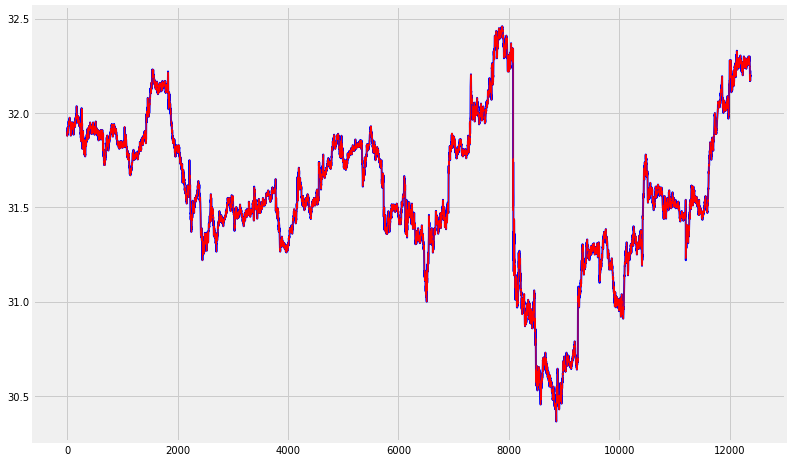

In [17]:
# Print the Mean squared error. 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# Print Root mean squared error.
print('Test RMSE: %.3f' % math.sqrt(error))
plt.figure(figsize=(12,8))
plt.plot(test, color='blue', linewidth=2)
plt.plot(predictions, color='red', linewidth=1)
plt.show()